# Tarea 11.

In [1]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

sy.init_printing()    #para que imprima bonito las integrales

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import numpy as np


from matplotlib import animation, rc
#from IPython.display import HTML
#%matplotlib inline
#sb.set()

In [5]:
#tex PREAMBLE

#******************************************************

#rc('font',**{'family':'serif','serif':['Times']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


## Sección I.

### 1. Leer tabla [r, xi, error]

In [12]:
data_lya_mp = np.loadtxt('dr14_lyalya_monopole.txt',dtype=float, skiprows=0)
data1= pd.DataFrame(data_lya_mp, columns=['r','xi','error_xi'])
data1.head()

#me resultó mejor usar np.loadtxt y luego convertir a dataframe pues pd.readcsv no detecta los espacios como 
#separados

,r,xi,error_xi
0,2.0,0.010298,0.000184
1,6.0,0.002726,0.000052
2,10.0,0.001441,0.000031
3,14.0,0.000831,0.000021
4,18.0,0.000514,0.000016


### 2. Calcular $r^2 \xi$

In [13]:
data1['r2xi']=(data1['r']**2)*data1['xi']
data1.head()

,r,xi,error_xi,r2xi
0,2.0,0.010298,0.000184,0.041191
1,6.0,0.002726,0.000052,0.098139
2,10.0,0.001441,0.000031,0.144063
3,14.0,0.000831,0.000021,0.162789
4,18.0,0.000514,0.000016,0.166543


Para propagar el error sabemos que si estamos multiplicando variables de la forma $$Q=\frac{a b ... c}{x y ... z}$$ 
y dichas variables tienen errores asociados no-correlacionados, entonces nuestro error estará dado por
$$\frac{\delta Q}{|Q|} = \left[\left(\frac{\delta a}{a} \right)^2+\left(\frac{\delta b}{b} \right)^2 + ... + (\left(\frac{\delta z}{z} \right)^2\right]^{1/2}$$

En este caso, únicamente $\xi$ tiene asociado error, por lo que la expresión anterior se reduce a $$\frac{\delta Q}{|Q|} = \frac{\delta\xi}{\xi}$$, por lo tanto tendremos $$\delta Q=Q\left(\frac{\delta\xi}{\xi}\right)$$ y finalmente nuestro resultado:

$$Q+\delta Q = r^2\xi + Q\left(\frac{\delta\xi}{\xi}\right) = r^2\xi \left(1 + \frac{\delta\xi}{\xi}\right)$$.


Fuente: http://ipl.physics.harvard.edu/wp-uploads/2013/03/PS3_Error_Propagation_sp13.pdf

In [14]:
data1['error_r2xi']=data1['r2xi']*(data1['error_xi']/data1['xi'])
data1.head()

,r,xi,error_xi,r2xi,error_r2xi
0,2.0,0.010298,0.000184,0.041191,0.000738
1,6.0,0.002726,0.000052,0.098139,0.001865
2,10.0,0.001441,0.000031,0.144063,0.003056
3,14.0,0.000831,0.000021,0.162789,0.004143
4,18.0,0.000514,0.000016,0.166543,0.005192


### 3. Graficar la nueva columna (con errores)

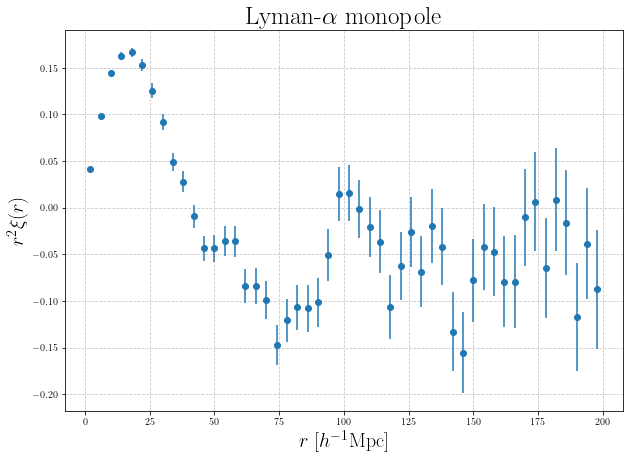

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

#ax.plot(data1['r'],data1['r2xi'],'-',)
ax.errorbar(data1['r'],data1['r2xi'],data1['error_r2xi'],fmt='o')

#ax.legend()
ax.set_title(r'Lyman-$\alpha$ monopole', fontsize=25)
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

### 4. Leer matriz de covarianza

In [64]:
data_lya_cov = np.loadtxt('dr14_lyalya_monopole.cov',dtype=float, skiprows=0)
data_lya_cov
#podemos ver que la tabla es una de 3 columnas por 2500 filas, sólo necesitamos la última columna puesto que las
#primeras dos sólo nos dan los índices de la matriz, entonces usaremos sólo data_lya_cov[:,2]

array([[0.00000000e+00, 0.00000000e+00, 3.40098445e-08],
       [0.00000000e+00, 1.00000000e+00, 3.46819846e-09],
       [0.00000000e+00, 2.00000000e+00, 5.93667410e-10],
       ...,
       [4.90000000e+01, 4.70000000e+01, 3.33790752e-13],
       [4.90000000e+01, 4.80000000e+01, 1.16512973e-12],
       [4.90000000e+01, 4.90000000e+01, 2.64780398e-12]])

In [65]:
data2= pd.DataFrame(data_lya_cov[:,2],# columns=['r','xi','error_xi']
                   )
data2.head()

,0
0,3.400984e-08
1,3.468198e-09
2,5.936674e-10
3,2.174434e-10
4,1.203683e-10


In [75]:
#usemos mejor array para darle forma de matriz 50x50
data2=data_lya_cov[:,2]
data22=np.log(abs(data2))
covmatrix=data22.reshape(50,50)
covmatrix

array([[-17.19661581, -19.47963055, -21.24470187, ..., -27.73500651,
        -27.09565846, -27.91530077],
       [-19.47963055, -19.73641438, -20.94791141, ..., -28.48194637,
        -28.11229067, -28.08259999],
       [-21.24470187, -20.94791141, -20.79172942, ..., -28.95242456,
        -28.57390975, -28.34797461],
       ...,
       [-27.73500651, -28.48194637, -28.95242456, ..., -26.68052862,
        -27.51088824, -28.72826209],
       [-27.09565846, -28.11229067, -28.57390975, ..., -27.51088824,
        -26.72285114, -27.47818868],
       [-27.91530077, -28.08259999, -28.34797461, ..., -28.72826209,
        -27.47818868, -26.6572905 ]])

### 5. Graficar covmat

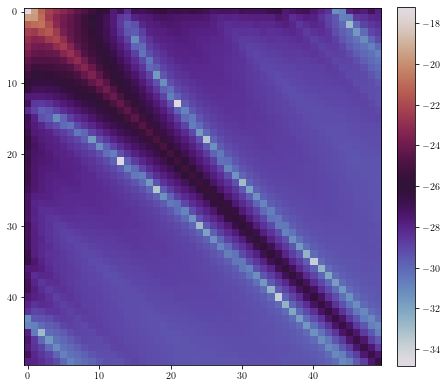

In [105]:
fig, ax = plt.subplots(figsize=(7,7))

c=ax.imshow(covmatrix, cmap='twilight')
fig.colorbar(c,fraction=0.046, pad=0.04)

<AxesSubplot:>

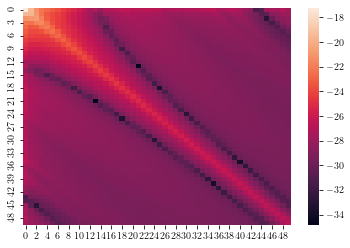

In [95]:
# y con seaborn
sb.heatmap(covmatrix)

### 6. Proponer una teoria para ajustar datos falsos

In [118]:
fake1 = pd.read_csv('new_dr14.csv')
fake1 = fake1.set_index('r', drop=False)
fake1.head(3)

,r,r2error,r2xi
r,,,
26.0,26.0,0.007621,0.194600
30.0,30.0,0.008811,0.105661
34.0,34.0,0.009856,0.076605


In [121]:
#In case you have a digonal covariance matrix

s= fake1['r2error']**2
covariance = pd.DataFrame(np.diag(s),index=s.index,columns=s.index)

In [122]:
def model(r,sigma,mu,A):
    return -0.18+ 0.0004*r + 250*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

### a) Variando $\mu$

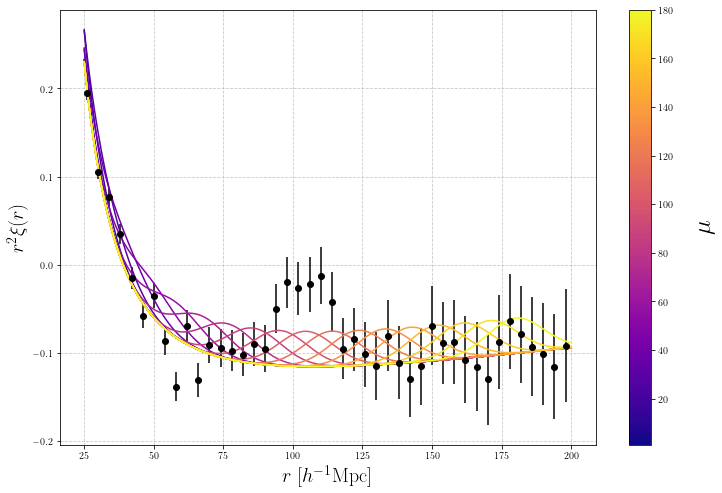

In [204]:
r     = np.linspace(25, 200, 200)
sigma = 10
mu    = np.linspace(1,180,20)
A     = 1


cmap='plasma'
norm1=mpl.colors.Normalize(vmin=min(mu), vmax=max(mu))
#normalizes the colormap to adjust to maxima and minima of set(blin)
mapper = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap)
#colormaps available at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig, ax = plt.subplots(figsize=(12,8))

for i in mu:
    ax.plot(r,model(r,sigma,i,A), color=mapper.to_rgba(i))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cmap)
m.set_array(mu)
cb1=plt.colorbar(m)
cb1.set_label(r'$\mu$',fontsize=25,rotation=90,labelpad=20)

#ax.legend()
#ax.set_title(r'FNT parameterisation')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

#### Notamos que $\mu$ controla una oscilación en cierta r

### b) Variando $\sigma$

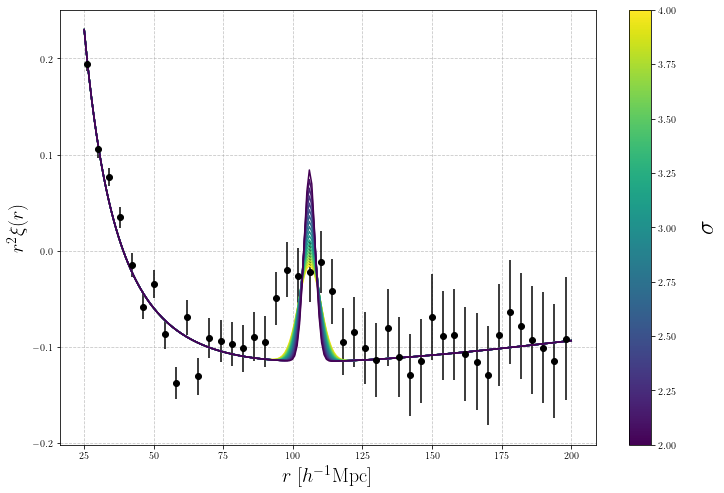

In [203]:
r     = np.linspace(25, 200, 200)
sigma = np.linspace(4,2,20)
mu    = 106
A     = 1


cmap='viridis'
norm1=mpl.colors.Normalize(vmin=min(sigma), vmax=max(sigma))
#normalizes the colormap to adjust to maxima and minima of set(blin)
mapper = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap)
#colormaps available at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig, ax = plt.subplots(figsize=(12,8))

for i in sigma:
    ax.plot(r,model(r,i,mu,A), color=mapper.to_rgba(i))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cmap)
m.set_array(sigma)
cb1=plt.colorbar(m)
cb1.set_label(r'$\sigma$',fontsize=25,rotation=90,labelpad=20)

#ax.legend()
#ax.set_title(r'FNT parameterisation')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

#### Notamos que $\sigma$ controla la profundidad de dicha oscilación. Para valores pequeños obtenemos una distribución más picuda. Pero notemos que todas tienen una amplitud similar.

Variando $A$

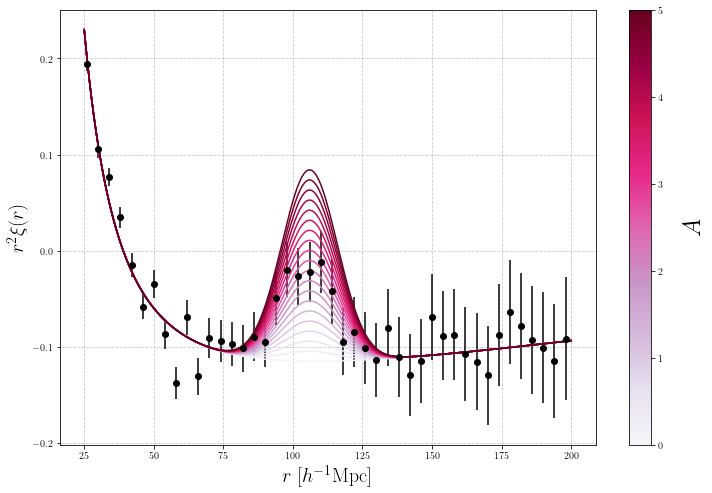

In [202]:
r     = np.linspace(25, 200, 200)
sigma = 10
mu    = 106
A     = np.linspace(0,5, 20)


cmap='PuRd'
norm1=mpl.colors.Normalize(vmin=min(A), vmax=max(A))
#normalizes the colormap to adjust to maxima and minima of set(blin)
mapper = mpl.cm.ScalarMappable(norm=norm1, cmap=cmap)
#colormaps available at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig, ax = plt.subplots(figsize=(12,8))

for i in A:
    ax.plot(r,model(r,sigma,mu,i), color=mapper.to_rgba(i))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

import matplotlib.cm as cm
m = cm.ScalarMappable(cmap=cmap)
m.set_array(A)
cb1=plt.colorbar(m)
cb1.set_label(r'$A$',fontsize=25,rotation=90,labelpad=20)

#ax.legend()
#ax.set_title(r'FNT parameterisation')
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

#### Notamos que $A$ controla la amplitud de la oscilación. 

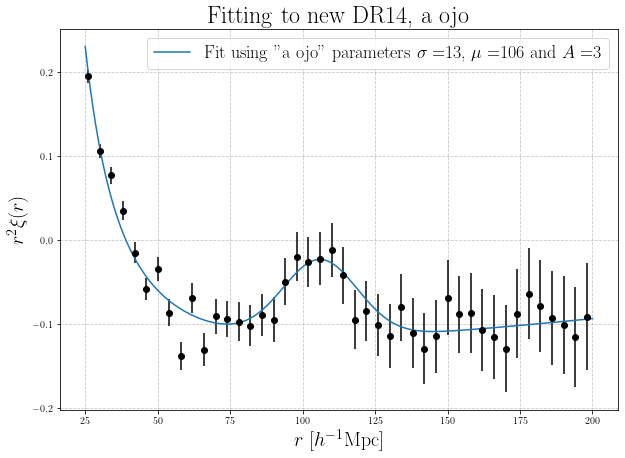

In [205]:
r     = np.linspace(25, 200, 200)
sigma = 13
mu    = 106
A     = 3

fig, ax = plt.subplots(figsize=(10,7))

ax.plot(r,model(r,sigma,mu,A),label='Fit using "a ojo" parameters $\sigma=${0}, $\mu=${1} and $A=${2}'.format(sigma,mu,A))
ax.errorbar(fake1['r'],fake1['r2xi'],fake1['r2error'],fmt='o',color='black')

ax.legend(fontsize=18)
ax.set_title(r'Fitting to new DR14, a ojo',fontsize=24)
ax.set_ylabel('$r^2 \\xi(r)$',     fontsize=20)
ax.set_xlabel('$r$ [$h^{-1}$Mpc]', fontsize=20)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim(0.01,2.5)
ax.grid(which='both',linestyle='--',alpha=0.7)

Los valores que mejor se ajustan son:

## $$\{\sigma=13,\mu=106,A=3\}$$

### 7. Construir likelihood con $\mu$